In [7]:
import pandas as pd

ed=[pd.read_csv(
    './learning_sample/07/shikoku_electricity_%d.csv' % year,
    skiprows=3,
    names=['DATE','TIME','consumption'],
    parse_dates={'date_hour':['DATE','TIME']},
    index_col='date_hour')
    for year in [2012,2013,2014,2015,2016]
]
ed[0]  # 2012年分

,consumption
date_hour,
2012-07-02 00:00:00,261
2012-07-02 01:00:00,256
2012-07-02 02:00:00,269
2012-07-02 03:00:00,289
2012-07-02 04:00:00,297
...,...
2012-12-31 19:00:00,375
2012-12-31 20:00:00,364
2012-12-31 21:00:00,350


In [9]:
pd.concat(ed) # 2012-2016年分

,consumption
date_hour,
2012-07-02 00:00:00,261
2012-07-02 01:00:00,256
2012-07-02 02:00:00,269
2012-07-02 03:00:00,289
2012-07-02 04:00:00,297
...,...
2016-03-31 19:00:00,329
2016-03-31 20:00:00,317
2016-03-31 21:00:00,298


In [48]:
tmp=pd.read_csv(
    u'./learning_sample/07/47891_高松.csv',
    parse_dates={'date_hour':['日時']},
    index_col='date_hour',
    na_values="×"
)
del tmp["時"]

columns = {
    "降水量(mm)": "rain",
    "気温(℃)": "temperature",
    "日照時間(h)": "sunhour",
    "湿度(％)": "humid",
}
tmp.rename(columns=columns,inplace=True)
tmp

,気圧(hPa)現地,気圧(hPa)海面,rain,temperature,humid,風向・風速(m/s)風速,風向・風速(m/s)風向,sunhour
date_hour,,,,,,,,
2013-11-28 01:00:00,1012.1,1013.8,--,11.9,48.0,7.0,西,NaN
2013-11-28 02:00:00,1012.2,1013.9,--,11.5,50.0,7.4,西,NaN
2013-11-28 03:00:00,1012.3,1014.0,--,10.9,47.0,6.8,西,NaN
2013-11-28 04:00:00,1012.6,1014.3,--,10.3,44.0,6.9,西,NaN
2013-11-28 05:00:00,1012.7,1014.4,--,10.0,46.0,6.1,西,NaN
...,...,...,...,...,...,...,...,...
2012-07-06 20:00:00,1000.7,1002.3,1.0,27.6,78.0,4.0,西,0.0
2012-07-06 21:00:00,999.7,1001.3,10.0,23.9,82.0,7.8,西南西,NaN
2012-07-06 22:00:00,998.8,1000.4,1.5,23.6,87.0,3.0,西南西,NaN


In [55]:
takamatsu=elec_data.join(tmp['temperature']).dropna()
takamatsu

,consumption,temperature
date_hour,,
2012-07-02 01:00:00,256,24.5
2012-07-02 02:00:00,269,24.1
2012-07-02 03:00:00,289,23.6
2012-07-02 04:00:00,297,23.3
2012-07-02 05:00:00,289,23.0
...,...,...
2016-03-31 19:00:00,329,16.5
2016-03-31 20:00:00,317,16.5
2016-03-31 21:00:00,298,15.8


In [62]:
takamatsu_elec=takamatsu.values[:,0:1]
takamatsu_elec

array([[256.],
       [269.],
       [289.],
       ...,
       [298.],
       [283.],
       [274.]])

In [63]:
takamatsu_wthr=takamatsu.values[:,1:]
takamatsu_wthr

array([[24.5],
       [24.1],
       [23.6],
       ...,
       [15.8],
       [15.1],
       [14.6]])

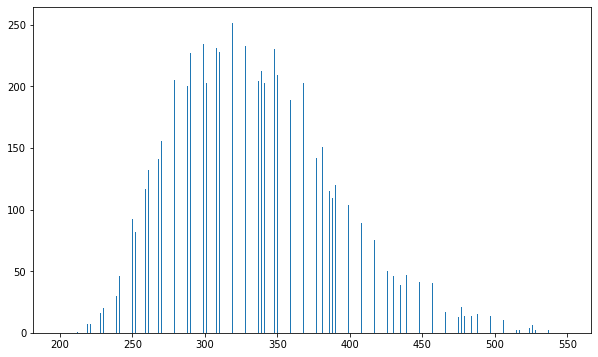

In [20]:
elec_data=pd.concat(ed)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.hist(elec_data['consumption'],bins=3000)
plt.show()

In [24]:
pd.to_datetime('2012/07/01 00:00:00')

Timestamp('2012-07-01 00:00:00')

In [29]:
(tmp.index-pd.to_datetime('2012/07/01 00:00:00')).days  # TimedeltaIndexオブジェクトにより経過時間がわかる

Int64Index([515, 515, 515, 515, 515, 515, 515, 515, 515, 515,
            ...
              5,   5,   5,   5,   5,   5,   5,   5,   5,   6],
           dtype='int64', name='date_hour', length=32856)

In [30]:
type(tmp.index-pd.to_datetime('2012/07/01 00:00:00'))

pandas.core.indexes.timedeltas.TimedeltaIndex

In [65]:
import sklearn.cross_validation

kf = sklearn.cross_validation.KFold(len(takamatsu_elec),n_folds=5)
kf

sklearn.cross_validation.KFold(n=32855, n_folds=5, shuffle=False, random_state=None)

In [70]:
[[train,test] for train,test in kf]

[[array([ 6571,  6572,  6573, ..., 32852, 32853, 32854]),
  array([   0,    1,    2, ..., 6568, 6569, 6570])],
 [array([    0,     1,     2, ..., 32852, 32853, 32854]),
  array([ 6571,  6572,  6573, ..., 13139, 13140, 13141])],
 [array([    0,     1,     2, ..., 32852, 32853, 32854]),
  array([13142, 13143, 13144, ..., 19710, 19711, 19712])],
 [array([    0,     1,     2, ..., 32852, 32853, 32854]),
  array([19713, 19714, 19715, ..., 26281, 26282, 26283])],
 [array([    0,     1,     2, ..., 26281, 26282, 26283]),
  array([26284, 26285, 26286, ..., 32852, 32853, 32854])]]

In [71]:
for train,test in kf:
    model=
    x_train=takamatsu_wthr[train]
    x_test=takamatsu_wthr[test]
    y_train=takamatsu_elec[train]
    y_test=takamatsu_elec[test]